## Análisis del Problema

El deporte, como inustria, mueve millones de dólares al año. Con respecto a las contrataciones, diferentes
tienen diferentes formas de “agrupar” o “catalogar” a los jugadores, pero en general hay una categoría de
jugadores sumamente cotizados que son considerados “súper estrellas”. Las implicaciones de estos jugadores
son muchas, pues no solo representan una gran inversión para el equipo sino que también se convierten en
una de las razones principales por las cuales el público va al estadio. A nivel de mercadotécnia, también es
una decsisión súmamente importante pues las súper estrellas suelen representar una de las principales cartas
comerciales.
Por estas razones, la decisión de si un jugador puede ser o no una súper estrella es de suma importancia, y
tener un modelo que pueda predecir potenciales súper estrellas para asisiter en la toma de estas decisiones
puede ser de suma importancia para diferentes equipos.

## Entendimiento de los Datos

Para analizar este problema, se tiene un conjunto de datos con 263 observaciones y 19 variables:
- Nombre del jugador: cualitativa; con 263 valores diferentes.
- ID de la Posición: cualitativa; con 10 valores diferentes entre 0 y 10.
- Tiros: cuantitativa; cantidad de tiros en la temporada anterior, con un rango entre 19 y 687.
- Tiros Hechos: cuantitativa; cantidad de tiros anotados en la temporada anterior, con un rango entre 1
y 238.
- Puntos Personales: cuantitativa; puntos anotados personalmente por el atleta la temporada anterior,
con un rango entre 0 y 40.
- Puntos Totales: cuantitativa; cantidad de puntos que el atleta contribuyó a anotar, con un rango entre
0 y 130.
- Asistencias: cuantitativa; cantidad de veces que el atleta contribuyó a quitarle la posesión del balón al
rival, con un rango entre 0 y 121.
- Concesiones: cuantitativa; cantidad de veces que una jugada del atleta causó que el rival cediera una
ventaja a la ofensiva, con un valor entre 0 y 105.
- Bloqueos: cuantitativa; cantidad de veces que el atleta bloqueó a un rival la temporada anterior, con
un valor entre 0 y 1377.
- Asistencias a Bloqueos: cuantitativa; cantidad de veces que el atleta asistió a un compañero a bloquear
a un rival, con un rango entre 0 y 492.
- Faltas: cuantitativa; cantidad de veces que el atleta cometió una falta, con un rival entre 0 y 32.
- Años de profesional: cuantitativa; cantidad de año que el atleta ha jugado a nivel profesional, con un
rango entre 1 y 24.
- Tiros en la carrera: cuantitativa; cantidad de tiros en toda la carrera del atleta, con un rango de 19 a
14053.
- Tiros hechos en la carrera: cuantitativa; cantidad de tiros hechos en la carrera del atleta, con un rango
de 4 a 4256.
- Puntos Personales en la carrera: cuantitativa; cantidad de puntos personales en la carrera del atleta,
con un rango de 0 a 548.
- Puntos Totales en la carrera: cuantitativa; puntos totales del atleta en toda su carrera, con un rango de
2 a 2165.
- Asistencias en la carrera: cuantitativa; cantidad de asistencias en toda la carrera, con un rango de 3 a
1659.
- Concesiones en la carrera: cuantitativa; cantidad de concesiones en toda la carrera, con un rango de 1 a
1566.
- Valor para el equipo: cualitativa; valor que puede tener el jugador para el equipo, con cuatro valores
posibles: Jugador de Rol, Contribuidor, Jugador de Franquicia y Súper Estrella. Esta variable se
manipuló durante el análisis para convertirla en binaria, respondiendo a la pregunta: ¿Es el jugador
una súper estrella? donde 0 es ‘No’ y 1 es ‘Sí’.

## Exploración de los Datos

Antes de explorar los datos, es necesario cargarlos y aplicar la transformación respectiva a la variable “valor
para el equipo”, pues el problema consiste en determinar cuáles jugadores son potencialmente súper estrellas.
Adicionalmente, se procede a dividir el conjunto de datos en uno de entrenamiento y otro de prueba.

In [2]:
#Evitar mostrar warning messages
options(warn=-1)

library(caTools)
library(rpart)
library(randomForest)
library(neuralnet)
library(ROCR)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess


Attaching package: 'ROCR'

The following object is masked from 'package:neuralnet':

    prediction



In [3]:
datos <- read.csv('Chapter11DataSet_Training.csv', header = T, na.strings = '?')
datos$Team_Value <- as.character(datos$Team_Value)
datos[datos$Team_Value != 'Superstar',]$Team_Value <- 0
datos[datos$Team_Value == 'Superstar',]$Team_Value <- 1
datos$Team_Value<- as.numeric(datos$Team_Value)
splt <- sample.split(datos$Team_Value, SplitRatio = 0.7)
entrenamiento <- datos[splt, ]
prueba <- datos[!splt, ]

Como podemos observar, la mayoría de las observaciones no son súper estrellas. Esto es esperado, pues la
esta categoría de jugadores generalmente son los menos.

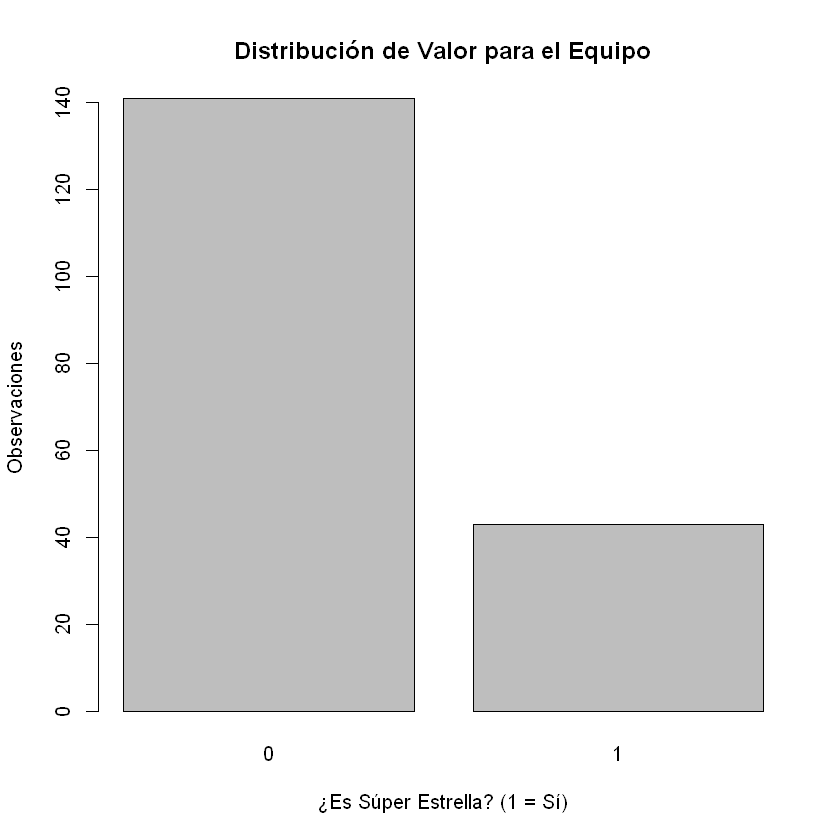

In [4]:
barplot(table(entrenamiento$Team_Value),
main = 'Distribución de Valor para el Equipo',
ylab = 'Observaciones',
xlab = '¿Es Súper Estrella? (1 = Sí)')

Para efectos de determinar qué variables influencian la determinación de si es una súper estrella o no, podemos
analizar algunas de las variales que acumulan el desempeño de la carrera.
En el caso de la variable Career_TP, se puede apreciar una diferencia considerable entre las dos categorías.
Sin embargo, los valores extremos de la categoría ‘No’ o 0 son mayores. Estos puntos anómalos en esa
categoría pueden ser los jugadores de franquicia.

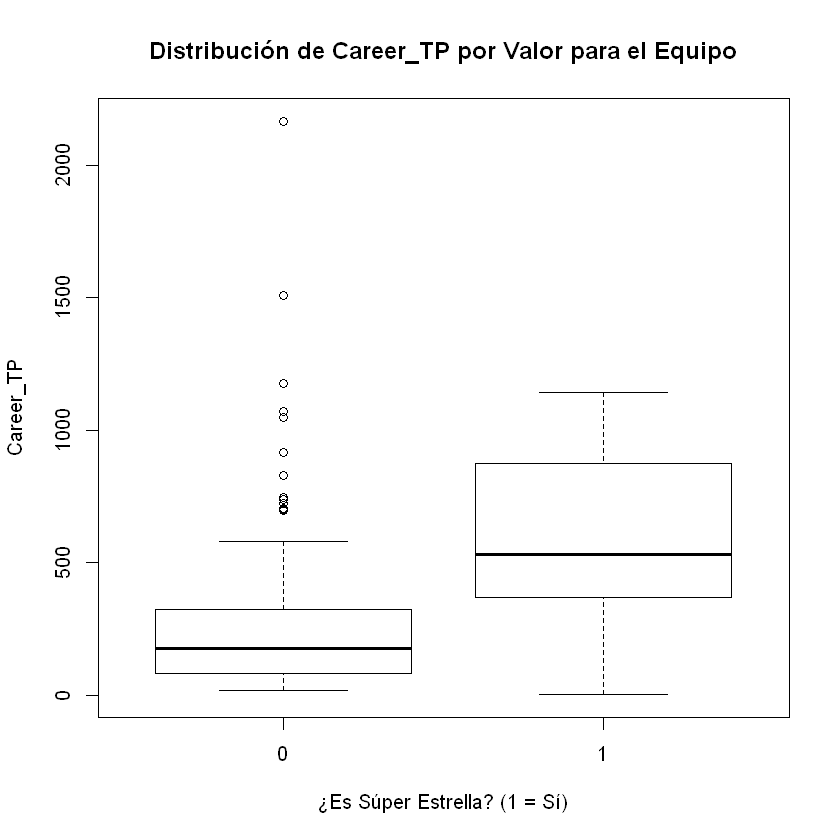

In [5]:
boxplot(Career_TP ~ Team_Value,
data = entrenamiento,
main = 'Distribución de Career_TP por Valor para el Equipo',
ylab = 'Career_TP',
xlab = '¿Es Súper Estrella? (1 = Sí)')

La variable Career_PP se comporta de manera similar:

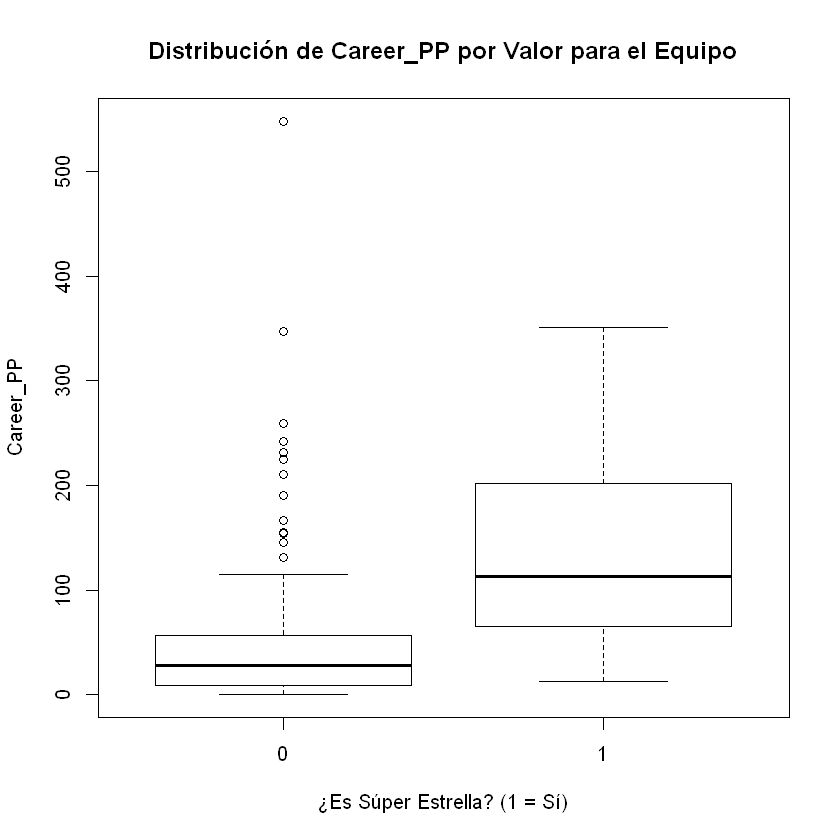

In [5]:
boxplot(Career_PP ~ Team_Value,
data = entrenamiento,
main = 'Distribución de Career_PP por Valor para el Equipo',
ylab = 'Career_PP',
xlab = '¿Es Súper Estrella? (1 = Sí)')

Y también la variable Career_Assists:

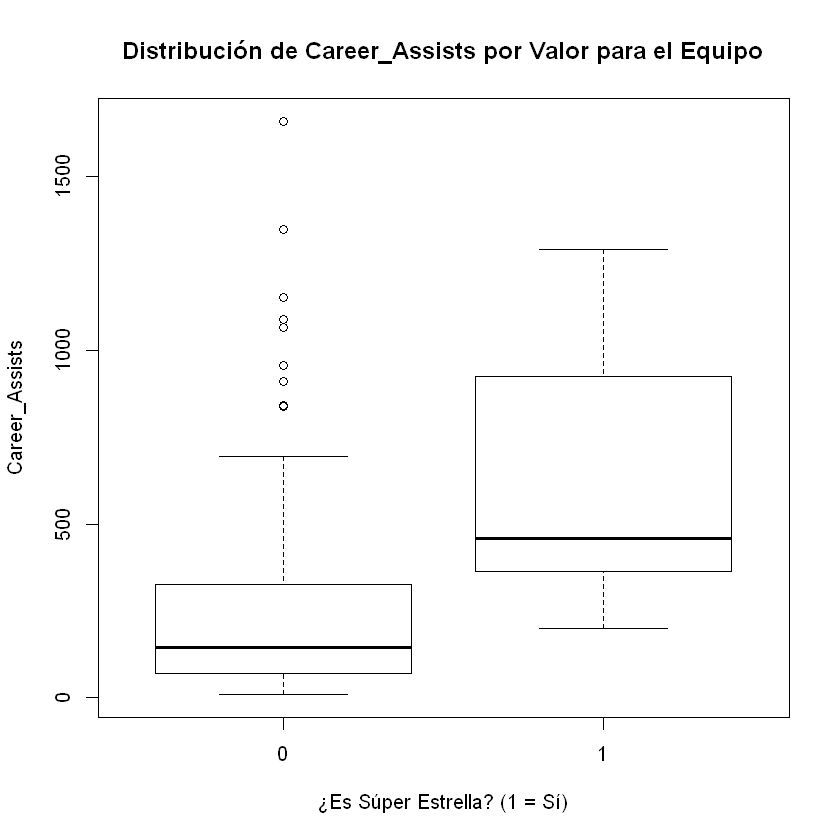

In [6]:
boxplot(Career_Assists ~ Team_Value,
data = entrenamiento,
main = 'Distribución de Career_Assists por Valor para el Equipo',
ylab = 'Career_Assists',
xlab = '¿Es Súper Estrella? (1 = Sí)')

Cuando se analizan las variables a nivel de la temporada anterior, el patrón se mantiene, aunque las diferencias
son menores:

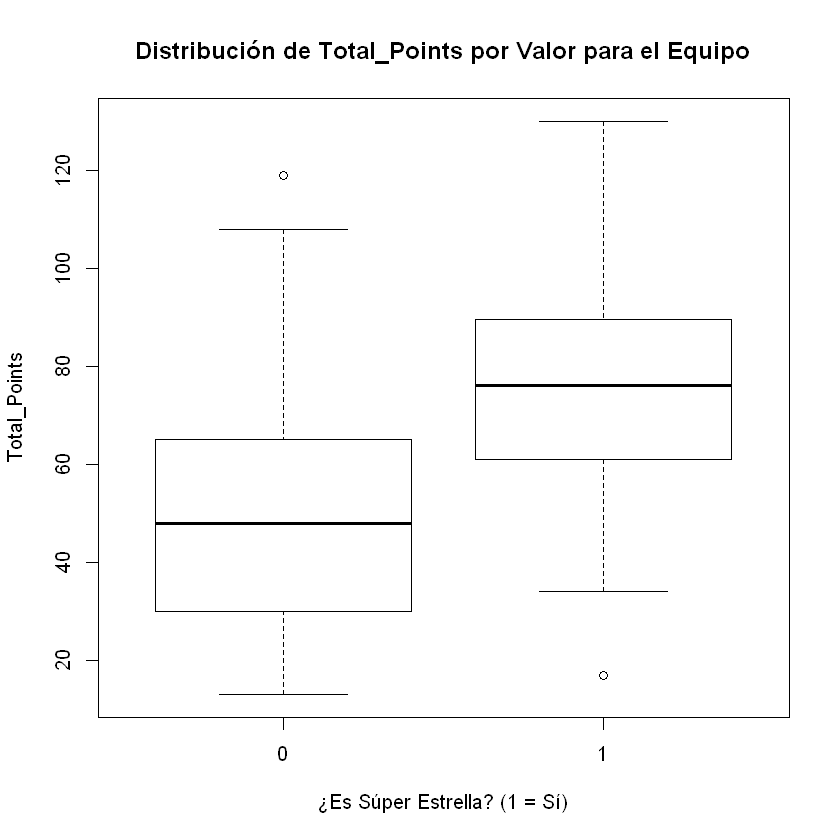

In [7]:
boxplot(Total_Points ~ Team_Value,
data = entrenamiento,
main = 'Distribución de Total_Points por Valor para el Equipo',
ylab = 'Total_Points',
xlab = '¿Es Súper Estrella? (1 = Sí)')

    La variable Career_PP se comporta de manera similar:

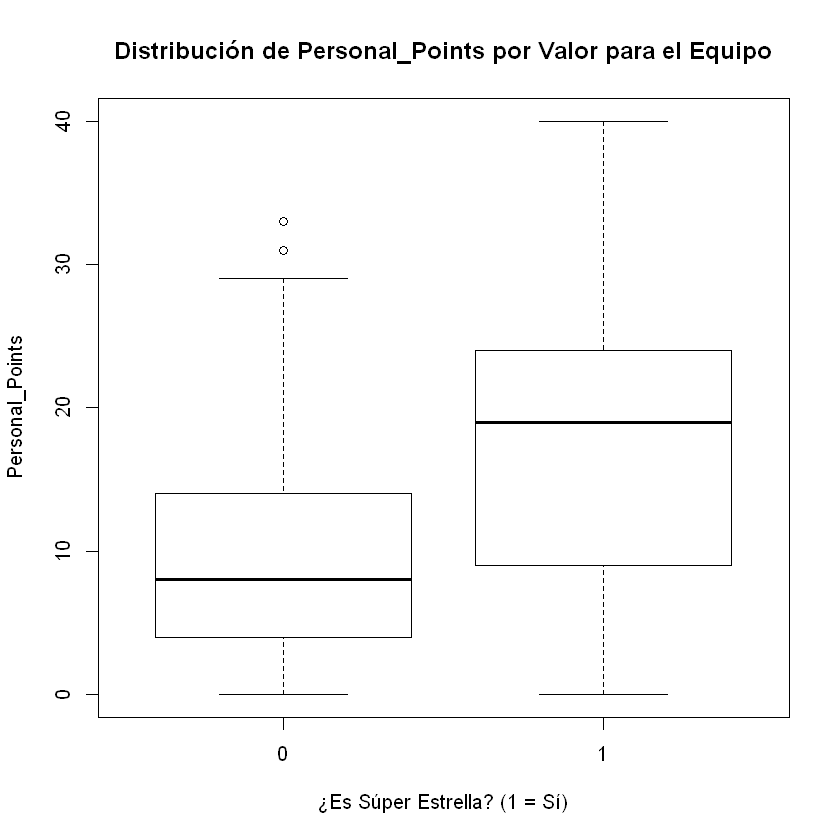

In [8]:
boxplot(Personal_Points ~ Team_Value,
data = entrenamiento,
main = 'Distribución de Personal_Points por Valor para el Equipo',
ylab = 'Personal_Points',
xlab = '¿Es Súper Estrella? (1 = Sí)')

Y también la variable Career_Assists:

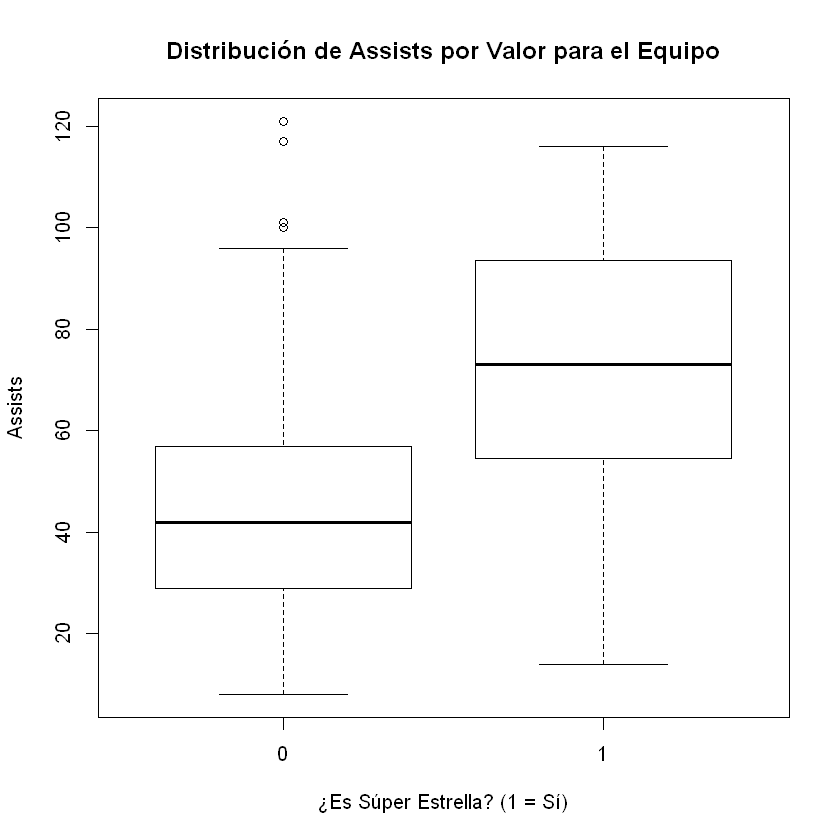

In [9]:
boxplot(Assists ~ Team_Value,
data = entrenamiento,
main = 'Distribución de Assists por Valor para el Equipo',
ylab = 'Assists',
xlab = '¿Es Súper Estrella? (1 = Sí)')

Hay algunas variables que tienden a favorecer el no, como por ejemplo la cantidad de faltas la temporada
anterior:

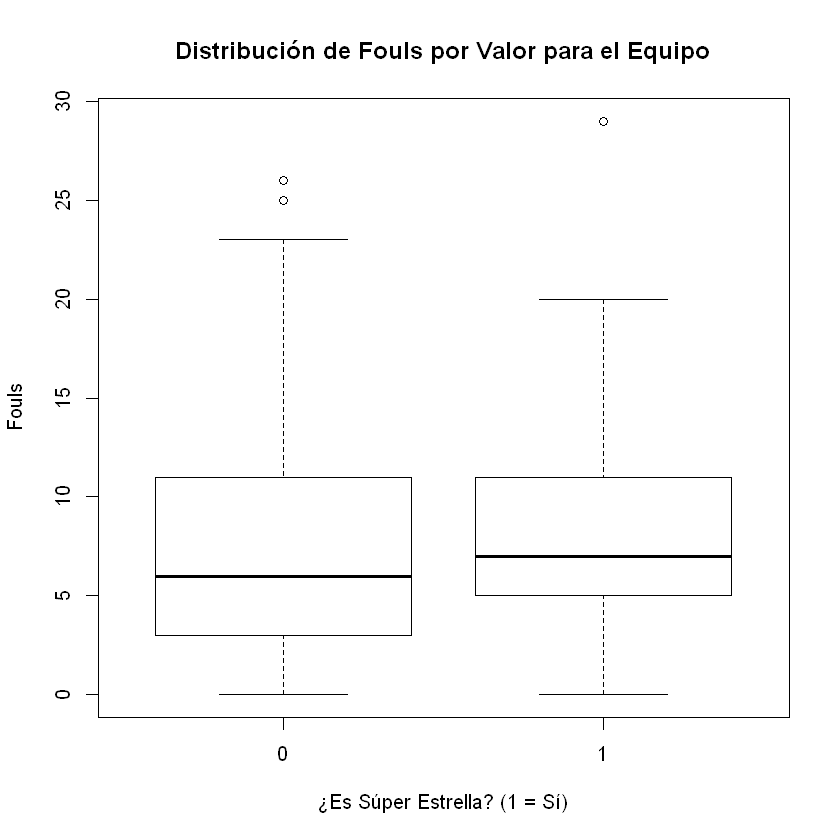

In [10]:
boxplot(Fouls ~ Team_Value,
data = entrenamiento,
main = 'Distribución de Fouls por Valor para el Equipo',
ylab = 'Fouls',
xlab = '¿Es Súper Estrella? (1 = Sí)')

A pesar de que el análisis exploratorio nos indica que podríamos guiarnos nada más por las estadísticas a nivel
de la carrera, si hacemos esto, corremos el riesgo de no tomar encuenta súper estrellas potenciales que están
en etapas tempranas en su carrera. Para evitar esto, y para aprovechar también la capacidad de las redes
neuronales, vamos a tomar en cuenta todas las variables cuantitativas para intentar responder la pregunta.

## Creación de los Modelos

En este caso, se van a utilizar una red neuronal, un árbol de decisión y un bosque aleatorio. Se comienza por
crear la red neuronal y por aplicarla a los datos de prueba:

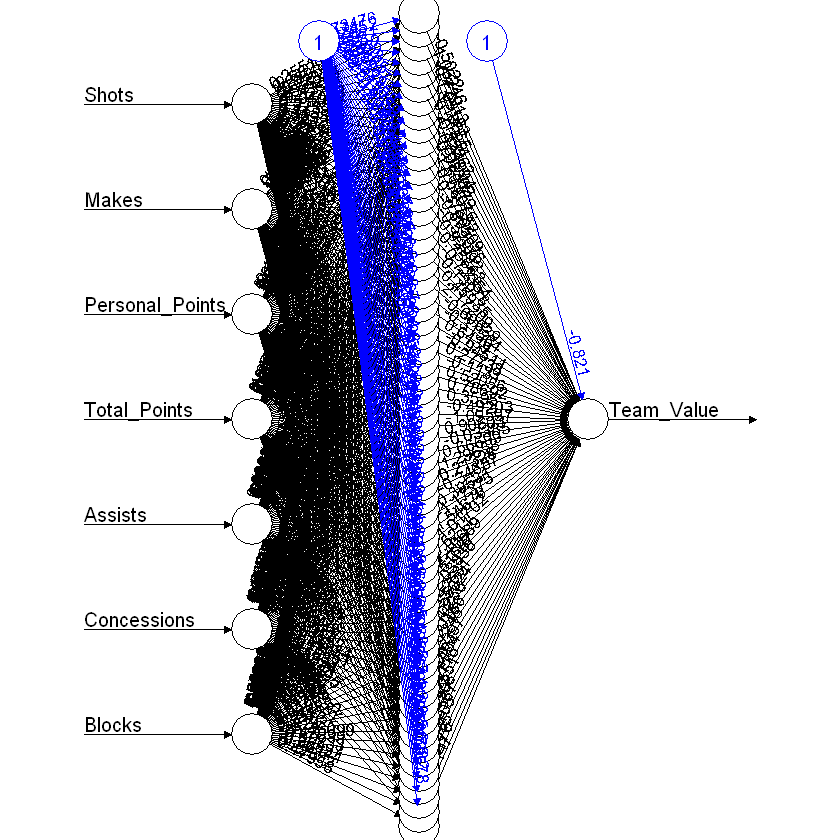

In [7]:
#crear red neuronal con 7 unidades en la capa oculta
modelo.red <- neuralnet(Team_Value ~ Shots + Makes + Personal_Points + Total_Points + Assists 
                        + Concessions+Blocks,data = entrenamiento,hidden =60,rep=1,linear.output=T)
plot(modelo.red,rep="best")

In [9]:
#realizar predicciones
predicciones.red <- neuralnet::compute(modelo.red,prueba[,c("Shots","Makes","Personal_Points","Total_Points","Assists","Concessions","Blocks")])
#predicciones.red$net.result

results <- data.frame(actual = prueba$Team_Value, prediction = predicciones.red$net.result)
results

predicciones.redClass=ifelse(predicciones.red$net.result>=0.5,1,0)
predicciones.redClass
#table(predicciones.redClass)
#table(prueba[,c("Team_Value")])

,actual,prediction
,<dbl>,<dbl>
7,0,0.2310358039706
10,0,0.2052602363485
12,0,-0.2093687707848
13,0,0.5515751639859
14,0,-0.2059062730122
19,0,0.0001065723788
20,0,-0.0086772829205
22,0,-0.0086154753963
24,1,-0.6973135490767


7,0
10,0
12,0
13,1
14,0
19,0
20,0
22,0
24,0
25,0
30,0


Posteriormente, se crea el árbol de decisión:

In [10]:
#crear modelo
set.seed(14234)
modelo.arbol <- rpart(Team_Value ~ Shots + Makes + Personal_Points + Total_Points + Assists + Concessions+Blocks,data = entrenamiento)

In [20]:
#realizar predicciones
predicciones.arbol <- predict(modelo.arbol, newdata = prueba)

Finalmente, el bosque aleatorio:

In [12]:
#crear modelo
set.seed(14234)
modelo.bosque <- randomForest(Team_Value ~ Shots + Makes + Personal_Points + Total_Points + Assists + Concessions+Blocks,data = entrenamiento)

In [14]:
#realizar predicciones
predicciones.bosque <- predict(modelo.bosque, newdata = prueba)

## Evaluación

Averiguamos el desempeño de la red neuronal:

In [15]:
data=ifelse(predicciones.red$net.result >= 0.5,1,0)
data
table(prueba$Team_Value, predicciones.red$net.result)

7,0
10,0
12,0
13,1
14,0
19,0
20,0
22,0
24,0
25,0
30,0


   
    -1.95534441379611 -1.14720941411251 -1.14578628143517 -0.985203204066077
  0                 1                 0                 0                  1
  1                 0                 1                 1                  0
   
    -0.925998654250258 -0.921852588852939 -0.909866190679661 -0.719687474169452
  0                  1                  1                  1                  1
  1                  0                  0                  0                  0
   
    -0.697313549076681 -0.667813227961542 -0.641319530724985 -0.615350405842867
  0                  0                  1                  1                  1
  1                  1                  0                  0                  0
   
    -0.48803464702027 -0.446302059816563 -0.427211549042194 -0.372141894690524
  0                 1                  1                  1                  1
  1                 0                  0                  0                  0
   
    -0.295957701072723 -0.209368

In [16]:
prediccionROC.red <- prediction(predicciones.red$net.result, prueba$Team_Value)
as.numeric(performance(prediccionROC.red, "auc")@y.values)

[1] 0.6596491228

In [37]:

modelo.bosquep<-predict(modelo.bosque, newdata =prueba, type = 'class')
prediccionesROC=prediction(c(modelo.bosquep),c(prueba[,'Team_Value']))
as.numeric(performance(prediccionesROC, "auc")@y.values)

[1] 0.8105263158

In [28]:
## Conclusión